In [38]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

# Goals section

### Import files - Do not show this in dashboard

In [163]:
#This file will be used to show enrollment basic analysis and revenue basic analysis
#Revenue per student was calculated by dividing total revenue/total enrollment.
df = pd.read_csv('dashboard_total_enrollment.csv', index_col=0)
#We eliminate the office of education and department of education because they don't have students enrolled directly
df = df.loc[df['Agency Name'].apply(lambda x: 'OFFICE OF EDUCATION' not in x)]
df = df.loc[df['Agency Name'].apply(lambda x: 'DEPARTMENT OF EDUCATION' not in x)]


In [266]:
df2 = pd.read_csv('dashboard_final_merged.csv')

In [267]:
df2.shape

(8215, 28)

In [165]:
assDF=pd.read_csv('dashboard_assessment.csv', index_col=0)

In [158]:
#df.columns

In [147]:
#df2.columns

In [166]:
#Eliminate total enrollment is 0 or total revenue per student is 0, and only take schools with higher than 250 students. 
#Investigation showed no school should have more than 20,000 revenue per student.
df=df[df['Total Enrollment']!=0]
df=df[df['Total Enrollment']>250]
df=df[df['Revenue per student']!=0]
df=df[df['Revenue per student']<20000]
df_nonLosAngeles = df.drop(493, axis=0)
df_general_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment']<10000]
df_large_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment']>10000]

# Diagrams for goals section

### Histogram for Revenue per student.

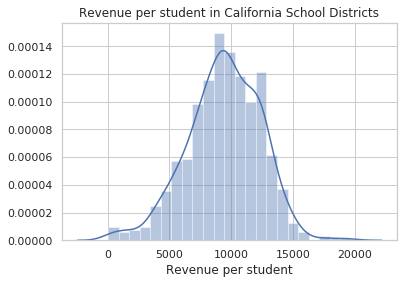

In [186]:
plt.figure(figsize=(6,4))
sns.distplot(df['Revenue per student'])
plt.title('Revenue per student in California School Districts')
plt.show()

### Enrollment per ethnicity in the state of California

In [168]:
DFfinMelt = pd.melt(df, id_vars=['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue', 'Revenue per student'], 
        value_vars=['Black', 'Hispanic', 'White', 'Asian or Asian/Pacific Islander','American Indian/Alaska Native', 'Hawaiian Nat./Pacific Isl.','Two or More Races'])
DFfinMelt.columns = ['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue','Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity']

In [169]:
pivot_df = DFfinMelt.pivot_table(values='Count Enrollment per ethnicity',index='Subgroup ID', aggfunc=np.sum).reset_index()
pivot_df.columns = ['Ethnicity', 'Total Enrollment']
pivot_df['Percent']=pivot_df['Total Enrollment']/(pivot_df['Total Enrollment'].sum())*100
pivot_df.style.format({'Total Enrollment': "{:,.0f}"})#,'Percent':"{:.0%}"})#,'Percent Not Disadvantaged':"{:.2%}"})

,Ethnicity,Total Enrollment,Percent
0,American Indian/Alaska Native,"30,771",0.508362
1,Asian or Asian/Pacific Islander,"711,232",11.7501
2,Black,"336,949",5.56667
3,Hawaiian Nat./Pacific Isl.,"28,691",0.473998
4,Hispanic,"3,280,343",54.1939
5,Two or More Races,"244,234",4.03494
6,White,"1,420,756",23.472


In [139]:
#plt.figure(figsize=(6, 4))
#sns.barplot(y='Total Enrollment',x='Ethnicity',data=pivot_df)
#plt.xticks(rotation=45, ha='right')
#plt.show()

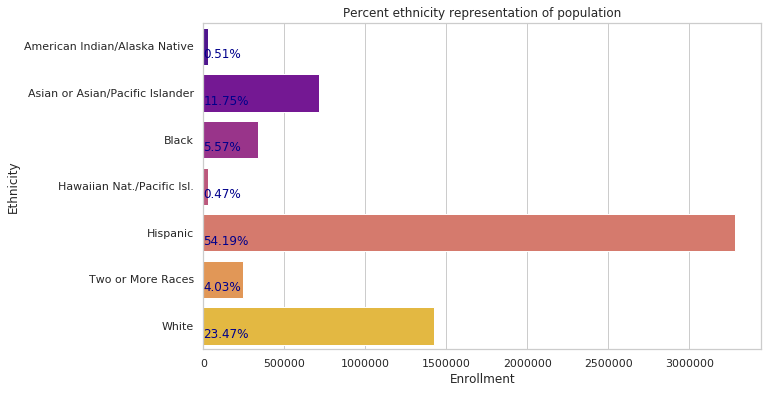

In [224]:
y= list(pivot_df['Percent'])
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="Total Enrollment", y='Ethnicity', data=pivot_df, ci=None ,orient='h', palette="plasma" )
ax.set_title("Percent ethnicity representation of population")
ax.set_xlabel ("Enrollment")
ax.set_ylabel ("Ethnicity")
for i, v in enumerate(pivot_df['Percent']):
    ax.text(v, i + .25,"%.2f%%"%(v), color='darkblue')
bar.savefig("Seaborn_Bar_Vertical.png");

### Mean Scale Scores - histogram

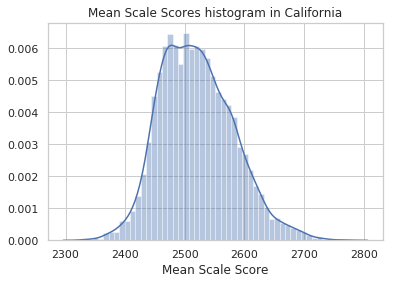

In [219]:
plt.figure(figsize=(6,4))
sns.distplot(assDF['Mean Scale Score'])
plt.title('Mean Scale Scores histogram in California')
plt.show()

## Percentage of students that pass the standard

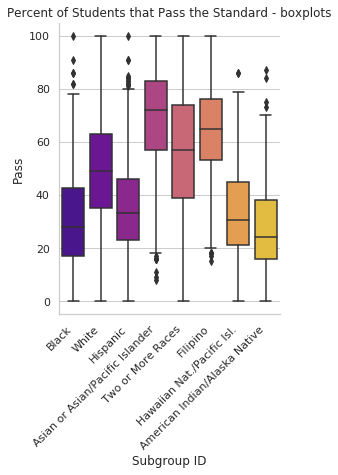

In [217]:
sns.catplot(x="Subgroup ID", y="Pass", kind="box", data=assDF, palette="plasma")
plt.xticks(rotation=45, ha='right')
_=plt.title('Percent of Students that Pass the Standard - boxplots')

In [159]:
#ass.columns

# Basic Analysis

## Scatter plot Total Revenue vs Total Enrollment 

In [ ]:
### Because los angeles is such a large district, we will separate the datasate from los angeles for this basic graph.
### Make a dynamic graph to show:
   ## 1 - Entire Dataset
   ## 1- Large districts without LA
   ## 2- Rest of the districts

In [173]:
df.sort_values(by='Total Enrollment', ascending=False).head(5)

,Unnamed: 0.1,District Code,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
493,499,64733.0,LOS ANGELES UNIFIED,1226.0,52837.0,468734.0,63828.0,1797.0,9767.0,35432.0,633621.0,8.441222e+09,13322.19
787,796,68338.0,SAN DIEGO UNIFIED,298.0,11087.0,59806.0,29347.0,572.0,9728.0,17202.0,128040.0,9.299510e+08,7262.97
488,494,64725.0,LONG BEACH UNIFIED,152.0,10157.0,43148.0,10090.0,1152.0,3635.0,8094.0,76428.0,9.148870e+08,11970.57
292,297,62166.0,FRESNO UNIFIED,435.0,6224.0,49722.0,7298.0,261.0,1321.0,8095.0,73356.0,9.304280e+08,12683.73
243,248,67314.0,ELK GROVE UNIFIED,397.0,7857.0,16487.0,12917.0,1033.0,5643.0,18218.0,62552.0,6.430600e+08,10280.41


In [174]:
df_nonLosAngeles = df.drop(493, axis=0)
df_general_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment']<10000]
df_large_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment']>10000]

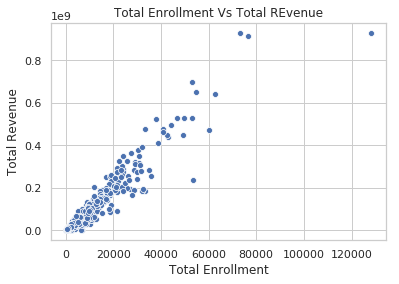

In [216]:
plt.figure()
sns.scatterplot(x='Total Enrollment', y='Total Revenue',data=df_nonLosAngeles, palette="plasma")
plt.title('Total Enrollment Vs Total REvenue')
plt.show()

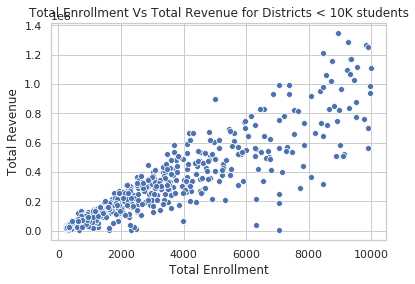

In [215]:
plt.figure()
sns.scatterplot(x='Total Enrollment', y='Total Revenue',data=df_general_districts, palette="plasma")
plt.title('Total Enrollment Vs Total Revenue for Districts < 10K students')
plt.show()

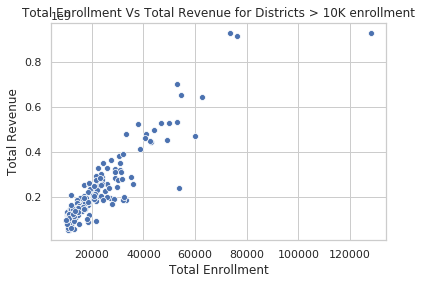

In [214]:
plt.figure()
sns.scatterplot(x='Total Enrollment', y='Total Revenue',data=df_large_districts, palette="plasma")
plt.title('Total Enrollment Vs Total Revenue for Districts > 10K enrollment')
plt.show()

### Mean Scale Scores per ethnicity

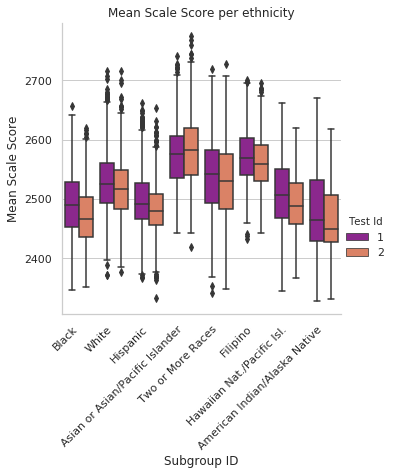

In [213]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=assDF, palette="plasma")
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score per ethnicity')

### We can see that Black and hispanic students have the lower scores

## Scatterplot Mean Scale Scores Vs Revenue per student

### Our main question is: Does Revenue per student impact Student scores?

In [268]:
df2.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Percentate Std Exceed',
       'Percentage Std Met', 'Percentage Std Nearly Met',
       'Percentage Std Not Met', 'Percentage Std Met and Above', 'Pass',
       'Fail'],
      dtype='object')

In [269]:
# dataset containing school districts with over $20,000 revenue per student - during our research
# we found information that there are no schools in California with revenue higher than 20 K and we chose to separate
#those schools.
df_high_funding = df2[(df2['Revenue per student'] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df_new = df2[(df2['Revenue per student'] < 20_000)]
df_new = df_new[(df_new['Revenue per student'] != 0)]

print(df_high_funding.shape)
print(df_new.shape)

(106, 28)
(7935, 28)


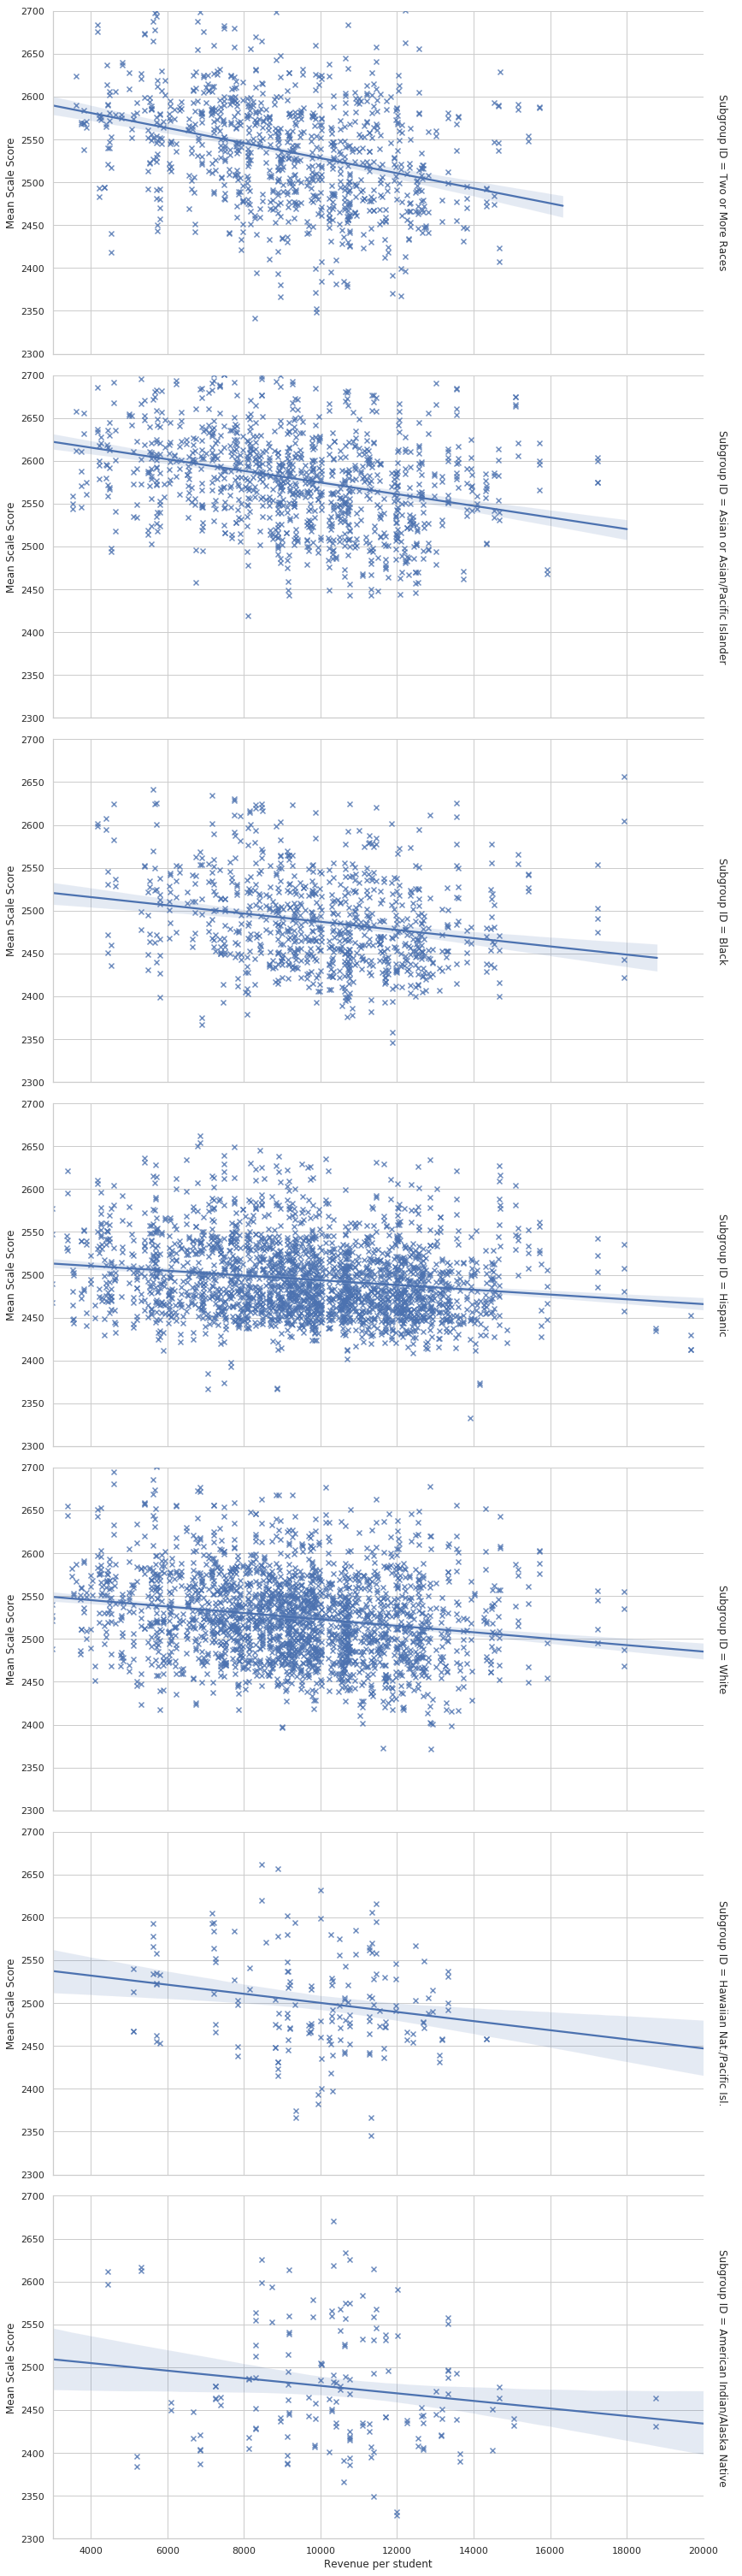

In [254]:
g = sns.FacetGrid(df_new, row='Subgroup ID', #hue="Disadvantaged", 
                  margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Revenue per student', 'Mean Scale Score',marker="x")
_=g.set(xlim=(3000, 20000), 
 ylim=(2300, 2700))
_=g.add_legend()

In [255]:
corr_cols=['District Code', 'Agency Name', 'Total Revenue',
       'Total Enrollment',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_new.drop(columns= corr_cols)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Revenue per student,1,0.0681877,-0.2335,-0.247412,0.247886
Count Enrollment per ethnicity,0.0681877,1,-0.0237221,-0.0240837,0.0243147
Mean Scale Score,-0.2335,-0.0237221,1,0.81965,-0.820351
Pass,-0.247412,-0.0240837,0.81965,1,-0.999546
Fail,0.247886,0.0243147,-0.820351,-0.999546,1


In [256]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [257]:
r,p,lo,hi=pearsonr_ci(df_new['Revenue per student'],df_new['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is -0.233500482787
The P for 95% is  1.00808739998e-98
The lower point of the confident interval is -0.25419771416
The higher point of the confidence interval is -0.212589477983


### It seems that revenue per student has a negative correlation to Mean Scale score or students passing. As we noted on each of the different ethnicities it would seem the larger the revenue per student the lower test scores, which is not what we were expecting. We then looked into searching for other factors that might be driving scores to be low.

# Extended EDA - Districts level

In [258]:
#From our basic analysis we saw that enrollment per district was very large and distribution on the districts
#Which made difficult to see our values, so we decided to divide the dataset in 4 main groups.
#large_districts_df = df_new[df_new['Total Enrollment'] >= 60_000]
#medium_districts_df= df_new[(df_new['Total Enrollment'] < 60_000) & (df_new['Total Enrollment'] >= 30_000)]
#small_districts_df = df_new=df_new[(df_new['Total Enrollment'] < 30_000) & (df_new['Total Enrollment'] >= 10_000)]
#smaller_districts_df = df_new[(df_new['Total Enrollment'] < 10_000) & (df_new['Total Enrollment'] >= 5_000)]

In [259]:
# When we see the distribution of revenue regardless of the size of the districts, 
#we see a range of 4K to 14K in revenue per student.
# Will create a dataset with all districts on the lower revenue per student 
#to see what is the size of those schools which seem to get the higher scores. See if we can find a pattern there.

#low_revenue_df = df_new[df_new['Revenue per student'] <= 8000]
#standard_revenue_df=df_new[(df_new['Revenue per student'] > 4000) & (df_new['Revenue per student'] <= 15000)]

In [260]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.4f} + {:.4f}x'.format(a, b))

    return a, b

## We went and got information on the economical background of students, and classified as Economically Disadvantaged and Not Economically Disadvantaged.

best fit line:
y = 2570.4890 + -0.0054x


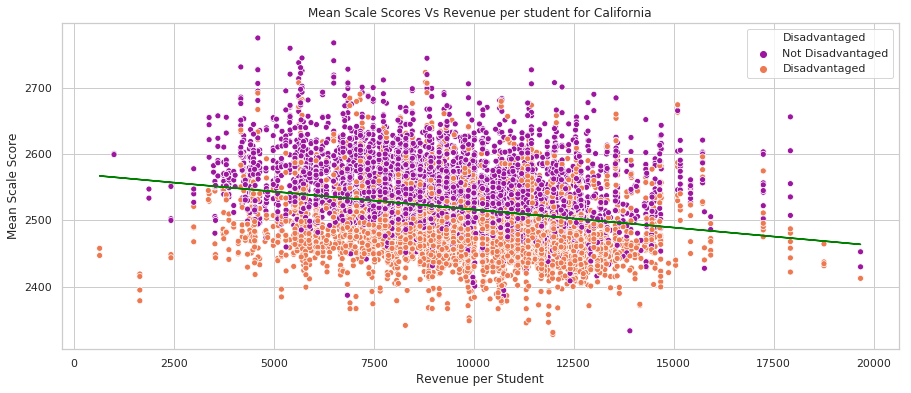

In [319]:
a, b = best_fit(df_new['Revenue per student'],df_new['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_new['Revenue per student'],df_new['Mean Scale Score'],hue=df_new['Disadvantaged'], palette='plasma')
yfit = [a + b * xi for xi in df_new['Revenue per student']]
plt.plot(df_new['Revenue per student'], yfit,color='green')
plt.title('Mean Scale Scores Vs Revenue per student for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

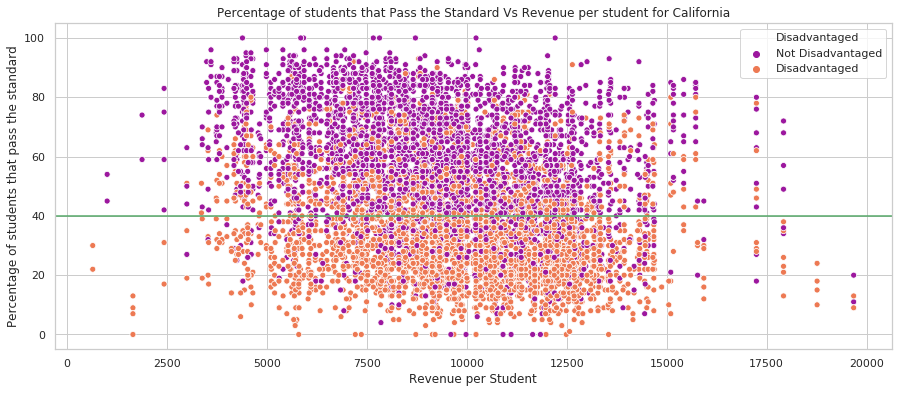

In [323]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_new['Revenue per student'],df_new['Pass'],hue=df_new['Disadvantaged'], palette='plasma')
plt.axhline(y=40, color='g', linestyle='-')
plt.title('Percentage of students that Pass the Standard Vs Revenue per student for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Percentage of students that pass the standard')

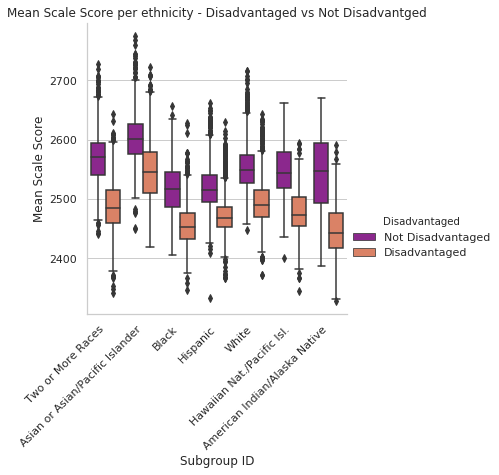

In [282]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Disadvantaged", kind="box", data=df_new, palette="plasma")
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score per ethnicity - Disadvantaged vs Not Disadvantged')

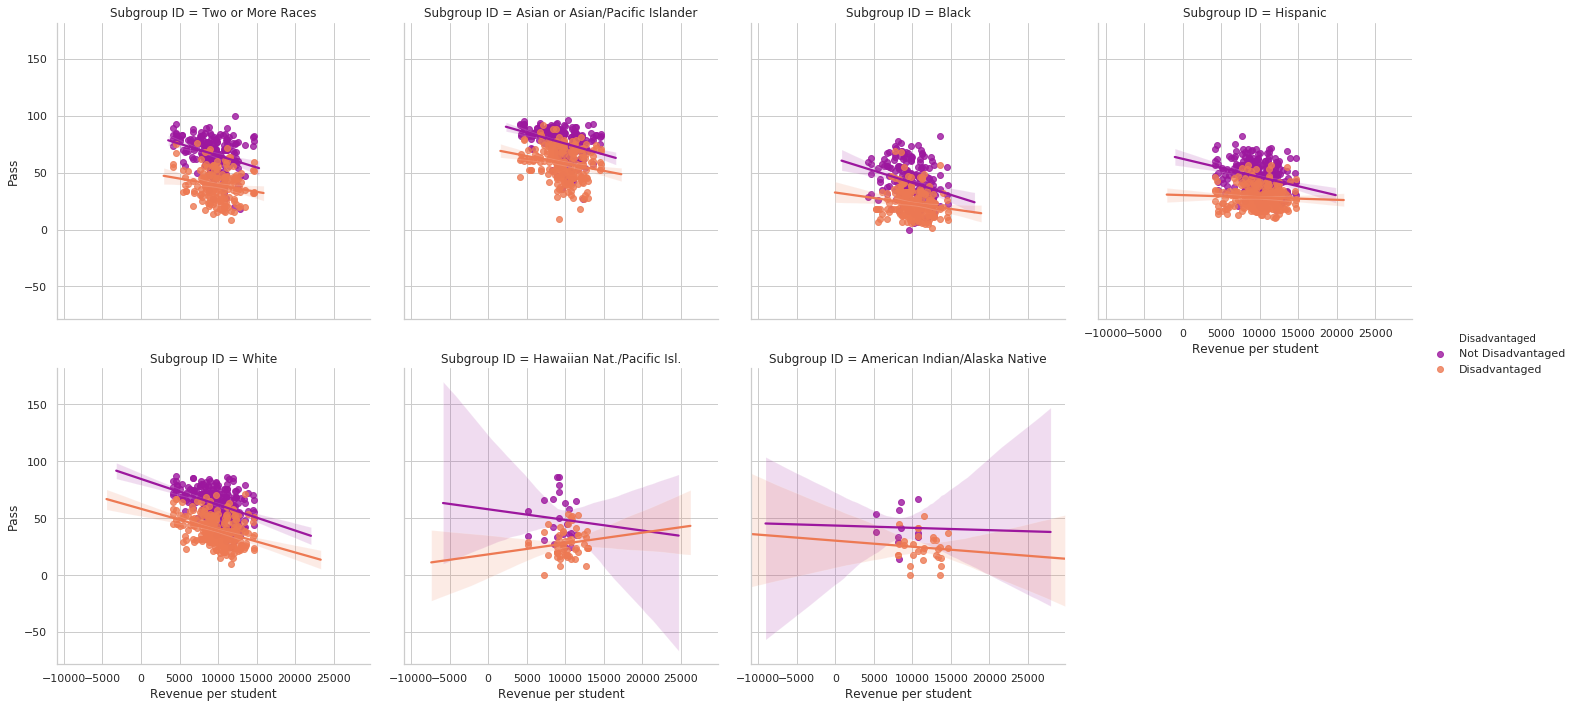

In [325]:
sns.lmplot(x="Revenue per student", y="Pass", hue="Disadvantaged", palette="plasma",
           col="Subgroup ID", #row="sex,"
           data=standard_revenue_df,col_wrap=4, height=5);

### It was very clear that we had a large gap between disadvantaged and not disadvantaged students. Next we looked for patterns on the size of the district.

In [273]:
cut_labels = ['Smaller', 'Small', 'Medium', 'Large']
cut_bins = [0, 10000, 30000, 60000,130000]
df_new['district_enrollment'] = pd.cut(df_new['Total Enrollment'], bins=cut_bins, labels=cut_labels)

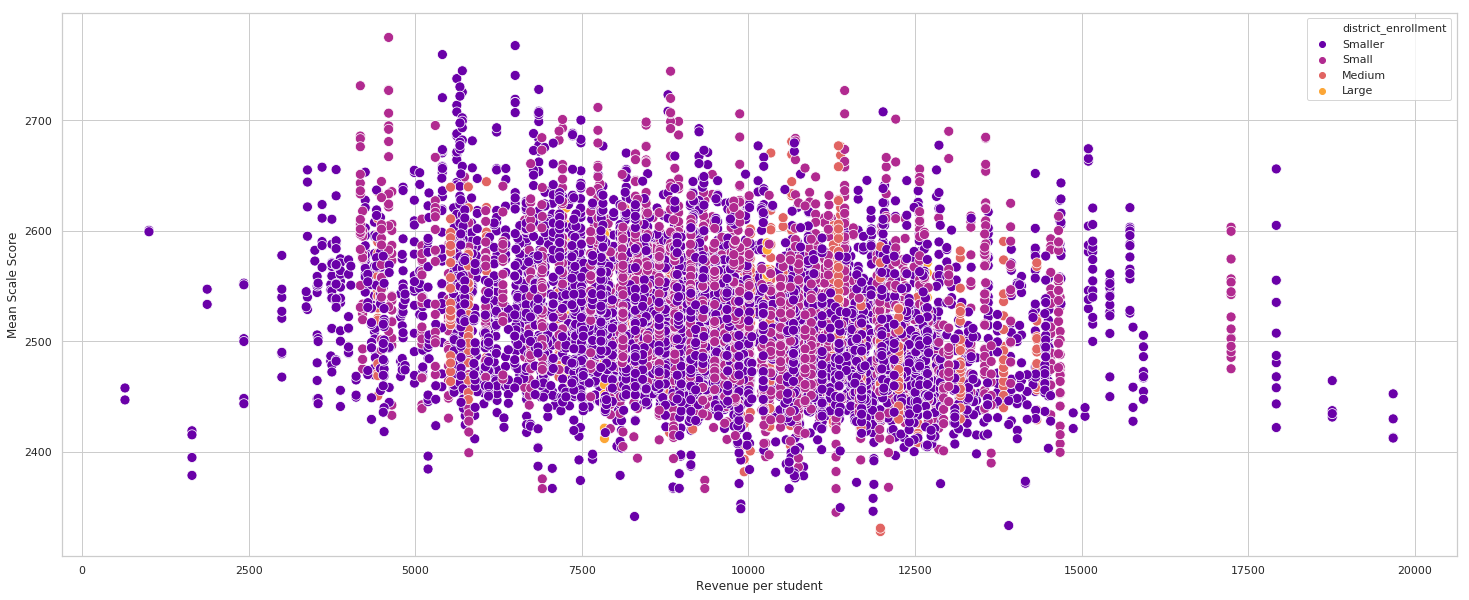

In [277]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x='Revenue per student', y='Mean Scale Score', palette ='plasma',#hue='Disadvantaged',
                hue='district_enrollment', s=100,data=df_new)
#plt.xticks(np.arange(min(df['Revenue per student']),max(df['Revenue per student']+2000),step=1000.0), rotation=45)
plt.show()

# EDA - School level

### After more investigation and research, we decided to look at the assessment data at the school level instead of the district level. Also, we looked to evaluate where the money was spent and how that could impact scores as well. We looked for other factors, like Teacher-Student Ratio, FTE Teachers.

In [329]:
school_df=pd.read_csv('dashboard_school_df.csv', index_col=0)
school_df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [330]:
#Correlaiton of revenue sources Vs Scores and Pass Fail
corr_columns = ['School Name', 'District Name', 'District Code_x',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= school_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

,Total Enrollment,Full-Time Equivalent (FTE) Teachers,Pupil/Teacher Ratio,Total Revenue (TOTALREV) per Pupil,Total Revenue - Local Sources (TLOCREV) per Pupil,Total Revenue - State Sources (TSTREV) per Pupil,Total Revenue - Federal Sources (TFEDREV) per Pupil,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1,0.981193,0.119524,0.0179617,-0.0183733,0.0466838,-0.0551725,0.50655,0.51796,0.153686,-0.153917
Full-Time Equivalent (FTE) Teachers,0.981193,1,0.0353761,0.0412834,0.000311773,0.0419085,-0.0462002,0.499742,0.518648,0.130064,-0.130384
Pupil/Teacher Ratio,0.119524,0.0353761,1,-0.102991,-0.0759152,0.0172256,-0.0544852,0.064395,0.0330814,0.147687,-0.147403
Total Revenue (TOTALREV) per Pupil,0.0179617,0.0412834,-0.102991,1,0.287953,0.315009,0.585067,0.0990487,-0.050095,-0.0812235,0.0811012
Total Revenue - Local Sources (TLOCREV) per Pupil,-0.0183733,0.000311773,-0.0759152,0.287953,1,-0.807629,-0.322308,-0.0911177,0.246151,0.297218,-0.297259
Total Revenue - State Sources (TSTREV) per Pupil,0.0466838,0.0419085,0.0172256,0.315009,-0.807629,1,0.574412,0.157227,-0.255659,-0.329286,0.32925
Total Revenue - Federal Sources (TFEDREV) per Pupil,-0.0551725,-0.0462002,-0.0544852,0.585067,-0.322308,0.574412,1,0.0834721,-0.235746,-0.264247,0.264189
Count Enrollment per ethnicity,0.50655,0.499742,0.064395,0.0990487,-0.0911177,0.157227,0.0834721,1,0.146368,-0.0504982,0.0509533
Mean Scale Score,0.51796,0.518648,0.0330814,-0.050095,0.246151,-0.255659,-0.235746,0.146368,1,0.729444,-0.72962
Pass,0.153686,0.130064,0.147687,-0.0812235,0.297218,-0.329286,-0.264247,-0.0504982,0.729444,1,-0.999666


In [331]:
#Correlation of expenditures with scores
corr_columns = ['School Name', 'District Name', 'District Code_x','Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
                'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= school_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

,Total Enrollment,Total Current Expenditures - Instruction (TCURINST) per Pupil,Total Current Expenditures - Support Services (TCURSSVC) per Pupil,Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil,Total Current Expenditures - Salary (Z32) per Pupil,Total Current Expenditures - Benefits (Z34) per Pupil,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1,0.0203148,0.00402847,-0.0612639,0.0665718,0.0551802,0.50655,0.51796,0.153686,-0.153917
Total Current Expenditures - Instruction (TCURINST) per Pupil,0.0203148,1,0.411459,0.408116,0.825924,0.646397,0.0797197,-0.0360654,-0.0107406,0.0109542
Total Current Expenditures - Support Services (TCURSSVC) per Pupil,0.00402847,0.411459,1,0.378564,0.598262,0.65018,0.100504,-0.0704933,-0.158492,0.158266
Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil,-0.0612639,0.408116,0.378564,1,0.37314,0.444486,0.0804064,-0.242166,-0.260917,0.260732
Total Current Expenditures - Salary (Z32) per Pupil,0.0665718,0.825924,0.598262,0.37314,1,0.534172,0.100282,0.035366,0.0270122,-0.0270567
Total Current Expenditures - Benefits (Z34) per Pupil,0.0551802,0.646397,0.65018,0.444486,0.534172,1,0.124768,-0.0741592,-0.114012,0.113995
Count Enrollment per ethnicity,0.50655,0.0797197,0.100504,0.0804064,0.100282,0.124768,1,0.146368,-0.0504982,0.0509533
Mean Scale Score,0.51796,-0.0360654,-0.0704933,-0.242166,0.035366,-0.0741592,0.146368,1,0.729444,-0.72962
Pass,0.153686,-0.0107406,-0.158492,-0.260917,0.0270122,-0.114012,-0.0504982,0.729444,1,-0.999666
Fail,-0.153917,0.0109542,0.158266,0.260732,-0.0270567,0.113995,0.0509533,-0.72962,-0.999666,1


best fit line:
y = 2429.6234 + 0.0083x


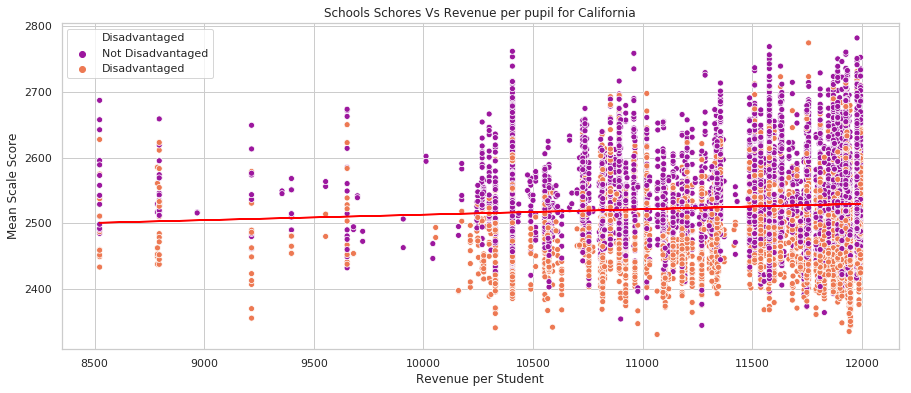

In [341]:
df_revenue=school_df[(school_df['Total Revenue (TOTALREV) per Pupil ']>=8000) & (school_df['Total Revenue (TOTALREV) per Pupil ']<12000)]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],
                hue=df_revenue['Disadvantaged'], palette='plasma')
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [342]:
r,p,lo,hi=pearsonr_ci(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is 0.0701310793893
The P for 95% is  8.74217265397e-11
The lower point of the confident interval is 0.048991982257
The higher point of the confidence interval is 0.0912073761017


best fit line:
y = 2524.3008 + -0.0010x


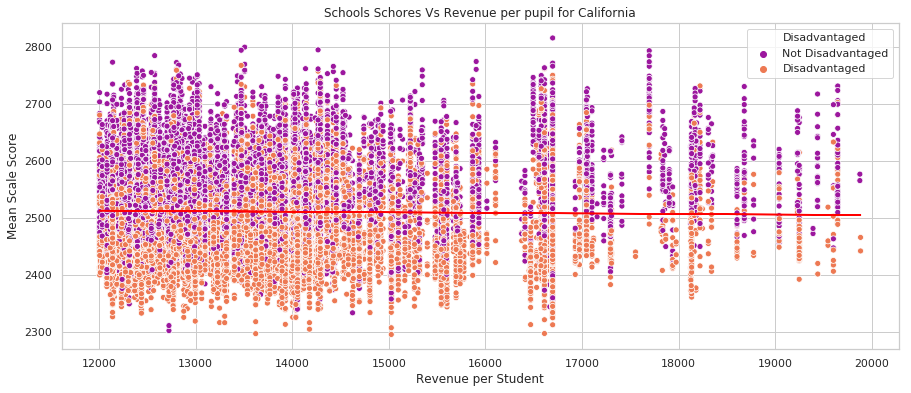

In [343]:
df_revenue=school_df[school_df['Total Revenue (TOTALREV) per Pupil ']>12000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],
                hue=df_revenue['Disadvantaged'], palette='plasma')
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [344]:
r,p,lo,hi=pearsonr_ci(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is -0.0198058729028
The P for 95% is  0.000317835208924
The lower point of the confident interval is -0.0305821269837
The higher point of the confidence interval is -0.00902501503163


## Compare scores with Total Enrollment of schools, on the correlation, there seems to be a positive correlation.

best fit line:
y = 2457.4674 + 0.0615x


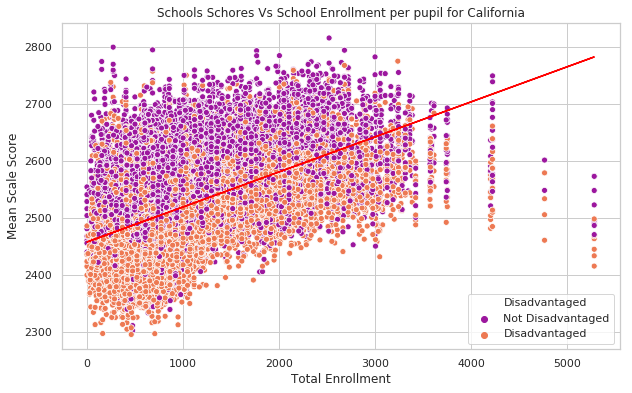

In [348]:
a, b = best_fit(school_df['Total Enrollment'],school_df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(school_df['Total Enrollment'],school_df['Mean Scale Score'], hue=school_df['Disadvantaged'],palette='plasma')
yfit = [a + b * xi for xi in school_df['Total Enrollment']]
plt.plot(school_df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

In [352]:
r,p,lo,hi=pearsonr_ci(school_df['Total Enrollment'],school_df['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is 0.51796022796
The P for 95% is  0.0
The lower point of the confident interval is 0.510901666183
The higher point of the confidence interval is 0.524948950869


## Teacher/Student Ratio also showed a positive correlation, let's look at it

best fit line:
y = 2485.6161 + 1.1773x


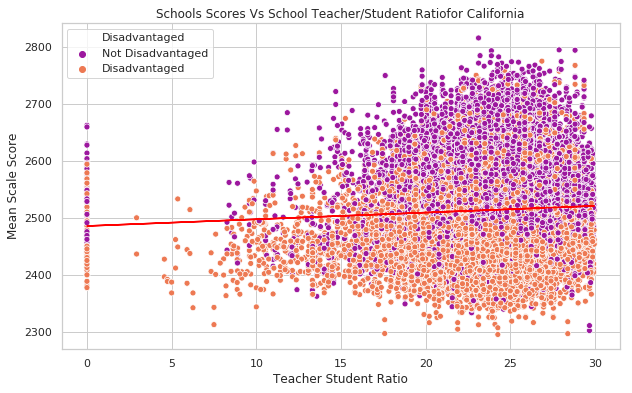

In [351]:
df_ts=school_df[school_df['Pupil/Teacher Ratio']<30]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Disadvantaged'],palette='plasma')
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

In [353]:
r,p,lo,hi=pearsonr_ci(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is 0.048788512056
The P for 95% is  6.21966481852e-23
The lower point of the confident interval is 0.0391031105663
The higher point of the confidence interval is 0.0584647469814


In [354]:
cut_labels = ['Less12K','More12K']
cut_bins = [0, 12000,50000]
school_df['expensePstudent'] = pd.cut(school_df['Total Expenditures (TOTALEXP) per Pupil '], bins=cut_bins, labels=cut_labels)